In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [2]:
df_demo = pd.read_csv('df_final_demo.txt')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_experiment = pd.read_csv('df_final_experiment_clients.txt')
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:
df_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [5]:
df_2 = pd.read_csv('df_final_web_data_pt_2.txt')
df_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_web = pd.concat([df_1, df_2], axis=0)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df = pd.merge(df_demo, df_experiment, on='client_id', how='left')
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [8]:
df['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [9]:
df['gendr'] = df['gendr'].replace('X', 'U')

In [10]:
df = pd.merge(df_web, df, on='client_id', how='left')

In [11]:
df.head(50)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,Test
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,Test


In [12]:
df.rename(columns={'Variation': 'variation'}, inplace=True)

In [13]:
df.isnull().sum()

client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
variation           434096
dtype: int64

In [14]:
df.dropna(subset=['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321195 entries, 0 to 637535
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         321195 non-null  int64  
 1   visitor_id        321195 non-null  object 
 2   visit_id          321195 non-null  object 
 3   process_step      321195 non-null  object 
 4   date_time         321195 non-null  object 
 5   clnt_tenure_yr    321195 non-null  float64
 6   clnt_tenure_mnth  321195 non-null  float64
 7   clnt_age          321195 non-null  float64
 8   gendr             321195 non-null  object 
 9   num_accts         321195 non-null  float64
 10  bal               321195 non-null  float64
 11  calls_6_mnth      321195 non-null  float64
 12  logons_6_mnth     321195 non-null  float64
 13  variation         321195 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 36.8+ MB


In [16]:
df.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.211950e+05,321195.000000,321195.000000,321195.000000,321195.000000,3.211950e+05,321195.000000,321195.000000
mean,5.009766e+06,12.176528,152.134818,48.553511,2.262962,1.622142e+05,3.236834,6.275082
std,2.872653e+06,6.963181,83.210462,15.645588,0.541536,3.494776e+05,2.193690,2.179757
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.051667e+06,11.000000,138.000000,50.000000,2.000000,6.924195e+04,3.000000,6.000000
75%,7.468390e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [17]:
df['client_id'].nunique()

50487

In [18]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2.0,1.0,4.0
1,2.0,1.0,4.0
2,2.0,1.0,4.0
3,2.0,1.0,4.0
4,2.0,1.0,4.0
...,...,...,...
637487,2.0,3.0,6.0
637532,3.0,6.0,9.0
637533,3.0,6.0,9.0
637534,3.0,6.0,9.0


In [19]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [20]:
avg_age_tenure_by_gender = df.groupby('gendr')[['clnt_age', 'clnt_tenure_yr']].mean()
avg_age_tenure_by_gender

,clnt_age,clnt_tenure_yr
gendr,,
F,51.658841,14.911535
M,50.765380,15.033653
U,43.385405,6.723047


In [21]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [22]:
df['variation'].unique()

array(['Test', 'Control'], dtype=object)

In [23]:
df.groupby('variation')['client_id'].nunique()

variation
Control    23526
Test       26961
Name: client_id, dtype: int64

In [24]:
# Step 1: Filter the DataFrame for 'confirm' step entries
users_reached_confirm = df[df['process_step'] == 'confirm']['client_id'].nunique()

# Step 2: Count total unique client_ids in the entire dataset
total_users = df['client_id'].nunique()

# Step 3: Calculate the completion rate
completion_rate = users_reached_confirm / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.56%


In [25]:
# Group by 'variation' and filter for 'confirm' step, then count unique client_ids
confirm_by_variation = df[df['process_step'] == 'confirm'].groupby('variation')['client_id'].nunique()

# Count total unique client_ids for each variation
total_users_by_variation = df.groupby('variation')['client_id'].nunique()

# Calculate the completion rate for each variation
completion_rate_by_variation = confirm_by_variation / total_users_by_variation

print("Completion Rate by Variation:")
print(completion_rate_by_variation)

Completion Rate by Variation:
variation
Control    0.655785
Test       0.692927
Name: client_id, dtype: float64


In [26]:
# Convert the Series to a DataFrame for merging
completion_rates_df = completion_rate_by_variation.reset_index()
completion_rates_df.columns = ['variation', 'completion_rate']

# Merge the completion rates back onto the original DataFrame based on 'variation'
df = df.merge(completion_rates_df, on='variation', how='left')

print(df)

        client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
321190    1574008  117364417_77840596075  528720790_71583064618_169151   
321191    2908510  814969699_90652851448   562606085_36368381773_92090   
321192    2908510  814969699_90652851448   562606085_36368381773_92090   
321193    2908510  814969699_90652851448   562606085_36368381773_92090   
321194    2908510  814969699_90652851448   562606085_36368381773_92090   

       process_step           date_time  clnt_tenure_yr  clnt_tenure_mnth  \
0            step_3 2017-04-17 15:

In [27]:
# Sort the DataFrame to ensure the calculation of exit times is accurate
df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Infer the exit time for each step as the date_time of the next action
df['exit_time'] = df.groupby('client_id')['date_time'].shift(-1)

# Calculate the duration spent on each step in seconds
df['duration_seconds'] = (df['exit_time'] - df['date_time']).dt.total_seconds()

# Exclude the last action of each session since its duration cannot be accurately calculated
df = df.dropna(subset=['duration_seconds'])

# Group by client_id and process_step to calculate the average duration for each user and step
average_durations_per_user = df.groupby(['client_id', 'process_step'])['duration_seconds'].mean().reset_index()

# Display the result
print("Average Duration by Process Step per User (in seconds):")
print(average_durations_per_user)


Average Duration by Process Step per User (in seconds):
        client_id process_step  duration_seconds
0             555        start          7.000000
1             555       step_1         32.000000
2             555       step_2         99.000000
3             555       step_3         20.000000
4             647        start          7.000000
...           ...          ...               ...
173237    9999729        start     390317.500000
173238    9999729       step_1     432906.666667
173239    9999729       step_2         60.000000
173240    9999729       step_3         21.000000
173241    9999832        start          8.000000

[173242 rows x 3 columns]


In [28]:
df['duration_seconds'].mean()

77224.53065295448

In [29]:
df['duration_seconds'].sort_values(ascending=True).head()

264439    0.0
54610     0.0
75720     0.0
75718     0.0
274370    0.0
Name: duration_seconds, dtype: float64

In [30]:
df.groupby('process_step')['duration_seconds'].mean().reset_index(name='average_duration_seconds')

,process_step,average_duration_seconds
0,confirm,339046.096893
1,start,110283.797313
2,step_1,49133.113849
3,step_2,27216.980919
4,step_3,45462.733505


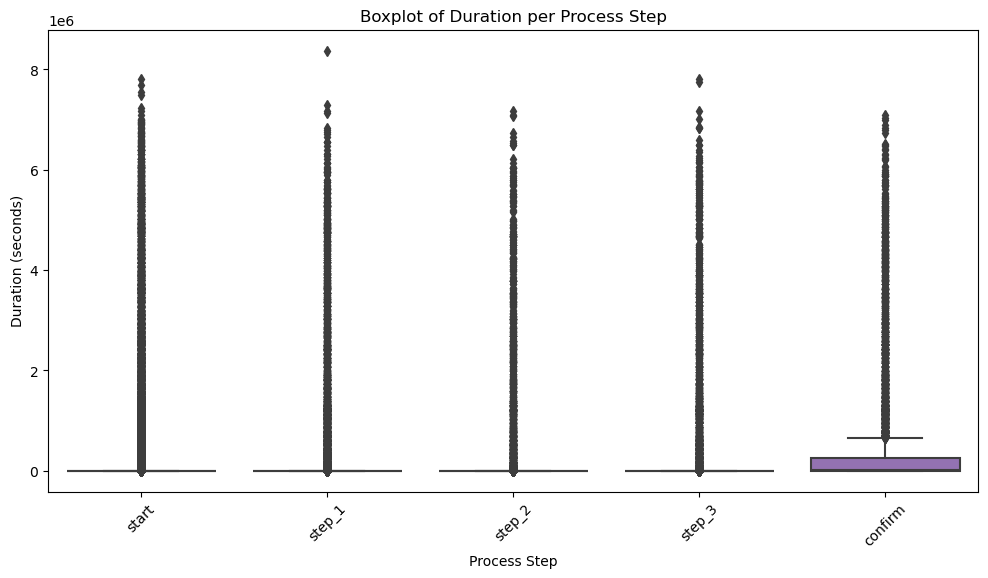

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='duration_seconds', data=df)
plt.title('Boxplot of Duration per Process Step')
plt.ylabel('Duration (seconds)')
plt.xlabel('Process Step')
plt.xticks(rotation=45)
plt.show()

In [32]:
Q1 = df['duration_seconds'].quantile(0.25)
Q3 = df['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the outliers
df['duration_seconds'] = df['duration_seconds'].clip(lower=lower_limit, upper=upper_limit)


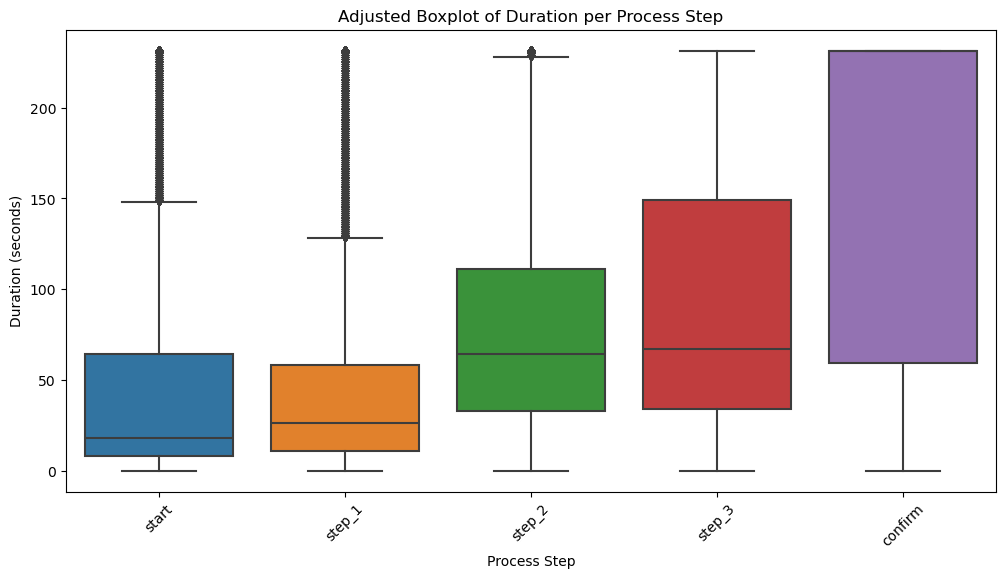

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='duration_seconds', data=df)
plt.title('Adjusted Boxplot of Duration per Process Step')
plt.ylabel('Duration (seconds)')
plt.xlabel('Process Step')
plt.xticks(rotation=45)
plt.show()

In [34]:
def remove_outliers(group):
    Q1 = group['duration_seconds'].quantile(0.25)
    Q3 = group['duration_seconds'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    group['duration_seconds'] = group['duration_seconds'].clip(lower=lower, upper=upper)
    return group


In [35]:
df.groupby('process_step').apply(remove_outliers)

client_id             visitor_id  \
process_step                                            
confirm      308921       1336  920624746_32603333901   
             308907       1336  920624746_32603333901   
             185901       1702  470573753_93844895765   
             302387       1702  470573753_93844895765   
             48006        1836  619440135_40983729273   
...                        ...                    ...   
step_3       134219    9998851  660529049_81285947655   
             97595     9998964  502193753_63097042630   
             39003     9999009  212849256_28644888524   
             178397    9999400  915967319_19082377501   
             276070    9999729  834634258_21862004160   

                                         visit_id process_step  \
process_step                                                     
confirm      308921  583743392_96265099036_939815      confirm   
             308907  614001770_19101025926_112779      confirm   
             185901  243444359_78696078676_118990      confirm   
             302387   825109778_55379502512_27372      confirm   
             48006   624455994_87386716654_950064      confirm   
...                                           ...          ...   
step_3       134219  310744937_17135608286_213964       step_3   
             97595   699981922_52880598802_858635       step_3   
             39003   149965839_24823291142_245569       step_3   
             178397  288904166_90826265353_276104       step_3   
             276070  870243567_56915814033_814203       step_3   

                              date_time  clnt_tenure_yr  clnt_tenure_mnth  \
process_step                                                                
confirm      308921 2017-05-08 06:08:43            48.0             576.0   
             308907 2017-05-08 08:21:38            48.0             576.0   
             185901 2017-04-01 11:44:04            21.0             260.0   
             302387 2017-06-05 12:04:58            21.0             260.0   
             48006  2017-04-05 18:49:51            13.0             157.0   
...                                 ...             ...               ...   
step_3       134219 2017-04-05 12:08:12             4.0              58.0   
             97595  2017-04-05 23:48:48             5.0              71.0   
             39003  2017-03-31 07:18:38            18.0             216.0   
             178397 2017-04-20 05:23:03             7.0              86.0   
             276070 2017-05-08 16:09:19            10.0             124.0   

                     clnt_age gendr  num_accts         bal  calls_6_mnth  \
process_step                                                               
confirm      308921      42.0     M        4.0   130537.18           6.0   
             308907      42.0     M        4.0   130537.18           6.0   
             185901      62.5     U        3.0  1769255.99           5.0   
             302387      62.5     U        3.0  1769255.99           5.0   
             48006       51.5     M        2.0   826232.62           4.0   
...                       ...   ...        ...         ...           ...   
step_3       134219      23.5     U        2.0    38473.54           3.0   
             97595       45.5     U        3.0    91766.49           6.0   
             39003       68.5     M        3.0  2055381.29           6.0   
             178397      28.5     U        2.0    51787.04           0.0   
             276070      31.0     F        3.0   107059.74           6.0   

                     logons_6_mnth variation  completion_rate  \
process_step                                                    
confirm      308921            9.0      Test         0.692927   
             308907            9.0      Test         0.692927   
             185901            8.0      Test         0.692927   
             302387            8.0      Test         0.692927   
             48006             7.0     

In [36]:
# Calculate the mean duration for each process step, segmented by variation group
mean_duration_by_step_and_variation = df.groupby(['process_step', 'variation'])['duration_seconds'].mean().reset_index(name='mean_duration_seconds')

# Display the result
print("Mean Duration by Process Step and Variation Group (in seconds):")
print(mean_duration_by_step_and_variation)

Mean Duration by Process Step and Variation Group (in seconds):
  process_step variation  mean_duration_seconds
0      confirm   Control             144.426642
1      confirm      Test             165.045815
2        start   Control              59.563358
3        start      Test              54.488531
4       step_1   Control              47.612839
5       step_1      Test              54.599164
6       step_2   Control              83.756791
7       step_2      Test              79.348384
8       step_3   Control             101.884022
9       step_3      Test              91.491777


In [37]:
df['duration_seconds'].min()

0.0

In [38]:
df.sort_values(by=['client_id', 'date_time'], inplace=True)

In [39]:
# This mapping should reflect the actual order of your process steps
step_order = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

# Map the process steps to their numerical order
df['step_order'] = df['process_step'].map(step_order)

In [40]:
# Sort the DataFrame by user and time
df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Identify backward movements
df['next_step_order'] = df.groupby('client_id')['step_order'].shift(-1)
df['is_backward'] = df['step_order'] > df['next_step_order']

In [41]:
# Calculate error instances per step
errors_per_step = df.groupby('process_step')['is_backward'].sum()

# Calculate total instances per step for normalization
total_instances_per_step = df.groupby('process_step')['is_backward'].count()

# Error rate per step
error_rate_per_step = errors_per_step / total_instances_per_step
print("Error Rate per Process Step:")
print(error_rate_per_step)

# For error rates per variation, you'd group by variation instead
errors_per_variation = df.groupby('variation')['is_backward'].sum()
total_instances_per_variation = df.groupby('variation')['is_backward'].count()
error_rate_per_variation = errors_per_variation / total_instances_per_variation
print("\nError Rate per Variation Group:")
print(error_rate_per_variation)

Error Rate per Process Step:
process_step
confirm    0.176280
start      0.000000
step_1     0.146855
step_2     0.129104
step_3     0.205804
Name: is_backward, dtype: float64

Error Rate per Variation Group:
variation
Control    0.097396
Test       0.109524
Name: is_backward, dtype: float64


In [42]:
# Step 1: Calculate the error rate for each variation
error_rate_by_variation = df.groupby('variation')['is_backward'].mean().reset_index()
error_rate_by_variation.rename(columns={'is_backward': 'error_rate'}, inplace=True)

# Step 2: Merge the error rate back into the original DataFrame
df = pd.merge(df, error_rate_by_variation, on='variation', how='left')


In [43]:
df

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,...,calls_6_mnth,logons_6_mnth,variation,completion_rate,exit_time,duration_seconds,step_order,next_step_order,is_backward,error_rate
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 12:58:03,7.0,1,2.0,False,0.109524
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 12:58:35,32.0,2,3.0,False,0.109524
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 13:00:14,99.0,3,4.0,False,0.109524
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 13:00:34,20.0,4,NaN,False,0.109524
4,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,12.0,151.0,57.5,M,2.0,...,0.0,4.0,Test,0.692927,2017-04-12 15:41:35,7.0,1,2.0,False,0.109524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270703,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:08:30,5.0,1,2.0,False,0.109524
270704,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:08:40,10.0,2,3.0,False,0.109524
270705,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:09:19,39.0,3,4.0,False,0.109524
270706,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:09:40,21.0,4,NaN,False,0.109524


In [44]:
count = np.array([confirm_by_variation['Test'], confirm_by_variation['Control']])
users = np.array([total_users_by_variation['Test'], total_users_by_variation['Control']])

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, users, alternative='two-sided')

print(f'Z-statistic: {stat}')
print(f'P-value: {pval}')

Z-statistic: 8.89274701899861
P-value: 5.961643587721425e-19


In [45]:
# Given the large Z-statistic and the very small P-value, you have very strong evidence to reject 
# the null hypothesis in favor of the alternative hypothesis. 
# This means that the difference in completion rates between the Test and Control groups is statistically significant. 
# The results strongly suggest that the new design (Test group) has a different effect on completion rates compared 
# to the old design (Control group).

In [46]:
# Calculate completion rates
completion_rate_test = confirm_by_variation['Test'] / total_users_by_variation['Test']
completion_rate_control = confirm_by_variation['Control'] / total_users_by_variation['Control']

# Calculate the difference in completion rates
completion_rate_difference = completion_rate_test - completion_rate_control

# Check if the difference meets or exceeds the 5% threshold
threshold = 0.05
meets_threshold = completion_rate_difference >= threshold

print(f"Completion Rate - Test Group: {completion_rate_test:.2%}")
print(f"Completion Rate - Control Group: {completion_rate_control:.2%}")
print(f"Difference in Completion Rates: {completion_rate_difference:.2%}")
print(f"Meets the 5% Threshold: {meets_threshold}")

if meets_threshold:
    print("The observed increase in completion rate meets or exceeds the 5% threshold.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold.")


Completion Rate - Test Group: 69.29%
Completion Rate - Control Group: 65.58%
Difference in Completion Rates: 3.71%
Meets the 5% Threshold: False
The observed increase in completion rate does not meet the 5% threshold.


In [47]:
# Separate the ages by group
ages_test = df[df['variation'] == 'Test']['clnt_age']
ages_control = df[df['variation'] == 'Control']['clnt_age']

# Conduct the two-sample t-test
t_statistic, p_value = stats.ttest_ind(ages_test, ages_control, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 9.318977459726131
P-value: 1.1835046637787918e-20


In [48]:
df

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,...,calls_6_mnth,logons_6_mnth,variation,completion_rate,exit_time,duration_seconds,step_order,next_step_order,is_backward,error_rate
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 12:58:03,7.0,1,2.0,False,0.109524
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 12:58:35,32.0,2,3.0,False,0.109524
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 13:00:14,99.0,3,4.0,False,0.109524
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,0.692927,2017-04-15 13:00:34,20.0,4,NaN,False,0.109524
4,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,12.0,151.0,57.5,M,2.0,...,0.0,4.0,Test,0.692927,2017-04-12 15:41:35,7.0,1,2.0,False,0.109524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270703,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:08:30,5.0,1,2.0,False,0.109524
270704,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:08:40,10.0,2,3.0,False,0.109524
270705,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:09:19,39.0,3,4.0,False,0.109524
270706,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,0.692927,2017-05-08 16:09:40,21.0,4,NaN,False,0.109524


In [50]:
df.to_csv('Vanguard_clean_2.csv', index=False)